# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch 
import torch.nn as nn
from collections import deque
import matplotlib.pyplot as plt
import random
import numpy as np
import time
from ddpg_agent import Agent

from collections import deque

env = UnityEnvironment(file_name="../../Tennis_Windows_x86_64/Tennis.exe")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name] 
print('State space:', env_info.vector_observations.shape[1])
print('action space:', brain.vector_action_space_size)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


State space: 24
action space: 2


In [2]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -7.38993645 -1.5
 -0.          0.          6.83172083  5.99607611 -0.          0.        ]


In [3]:
agents = [Agent(state_size=state_size, action_size=action_size, random_seed=0) for _ in range(2)]

In [4]:
print(agents)
actions = [agent.act(state, add_noise = False) for agent, state in zip(agents, states)]
actions_other_player = np.flip(actions, 0)
print(actions)
print(actions_other_player)
print("states shape before the loop:", states.shape)
print("states type before the loop:", type(states))

[<ddpg_agent.Agent object at 0x000001B814FE90B8>, <ddpg_agent.Agent object at 0x000001B814FE9860>]
[array([[-0.05526225, -0.03428214]], dtype=float32), array([[-0.0547871 , -0.03944019]], dtype=float32)]
[[[-0.0547871  -0.03944019]]

 [[-0.05526225 -0.03428214]]]
states shape before the loop: (2, 24)
states type before the loop: <class 'numpy.ndarray'>


In [5]:


def ACN(n_episodes=10000, max_t=10000):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    
    """
    
    times = []
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    times_window = deque(maxlen=100)
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        start_time = time.time()
        states = env_info.vector_observations
        for agent in agents:
            agent.reset()
            
        score = np.zeros(2)
        for t in range(max_t):
            actions = [agent.act(np.array(state), add_noise = False) for agent, state in zip(agents, states)]
            actions_other_players = np.array(np.flip(actions, 0))          # The actions of the other player
            env_info = env.step(actions)[brain_name]            # execute the selected actions and save the new information about the environment
            rewards = env_info.rewards
            next_states = env_info.vector_observations          # get the resulting states
            next_states_other_players = np.flip(next_states, 0)  # get the resulting states for the other player
            dones = env_info.local_done
#             agent.step(states, actions, actions_other_player, rewards, next_states, next_states_other_player, dones)
            for agent in agents:
                agent.step(states, actions, actions_other_players, rewards, next_states, next_states_other_players, dones)  # pass the information to the agent
            states = next_states
            score += rewards
            if np.any(dones):
                break
                
        end_time = time.time()
        times.append(end_time-start_time)
        avg_score = np.mean(score)
        scores_window.append(avg_score)       # save most recent score
        scores.append(avg_score)             # save most recent score
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, scores_window[-1]), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}, and time taken {:.2f}'.format(i_episode, scores_window[-1], end_time-start_time))
#         if np.mean(scores_window)>=30.0:
#             print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
#             save_checkpoint(agent.actor_local, agent.critic_local, 'actor_critic')
#             break
        if i_episode > 9000 :
            for idx, agent in enumerate(agents):
                # Save the actor model
                torch.save(agent.actor_local.state_dict(), f"actor_agent_{idx}_checkpoint.pth")
                # Save the critic model
                torch.save(agent.critic_local.state_dict(), f"critic_agent_{idx}_checkpoint.pth")
            break
        

            
    return scores, times

Episode 100	Average Score: 0.00, and time taken 0.18
Episode 200	Average Score: 0.00, and time taken 0.17
Episode 300	Average Score: 0.00, and time taken 0.17
Episode 400	Average Score: 0.00, and time taken 0.19
Episode 500	Average Score: 0.00, and time taken 0.17
Episode 600	Average Score: 0.00, and time taken 0.17
Episode 700	Average Score: 0.00, and time taken 0.18
Episode 800	Average Score: 0.00, and time taken 0.16
Episode 900	Average Score: 0.00, and time taken 0.16
Episode 1000	Average Score: 0.00, and time taken 0.16
Episode 1100	Average Score: 0.00, and time taken 0.16
Episode 1200	Average Score: 0.00, and time taken 0.16
Episode 1300	Average Score: 0.00, and time taken 0.16
Episode 1400	Average Score: 0.00, and time taken 0.16
Episode 1500	Average Score: 0.00, and time taken 0.15
Episode 1600	Average Score: 0.00, and time taken 0.17
Episode 1700	Average Score: 0.00, and time taken 0.16
Episode 1800	Average Score: 0.00, and time taken 0.16
Episode 1900	Average Score: 0.00, and

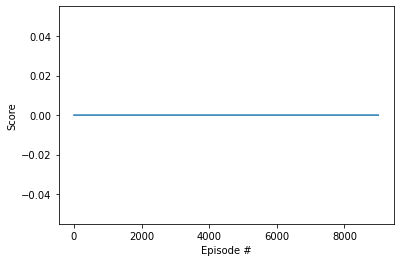

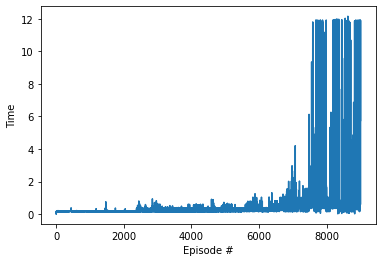

In [6]:
scores, times = ACN()
# env.close()  # close the environment as it is no longer needed

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(times)), times)
plt.ylabel('Time')
plt.xlabel('Episode #')
plt.show()

In [7]:
for idx, agent in enumerate(agents):
    # Load the actor model
    agent.actor_local.load_state_dict(torch.load(f"actor_agent_{idx}_checkpoint.pth"))
    # Load the critic model
    agent.critic_local.load_state_dict(torch.load(f"critic_agent_{idx}_checkpoint.pth"))
env_info = env.reset(train_mode=False)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)
print(states)

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -6.29900599 -1.5
  -0.          0.         -6.8150878   5.99607611 -0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -7.66749525 -1.5
   0.          0.          6.8150878   5.99607611  0.          0.        ]]


In [8]:
print(agents)

[<ddpg_agent.Agent object at 0x000001B814FE90B8>, <ddpg_agent.Agent object at 0x000001B814FE9860>]


In [10]:
                         # initialize the score (for each agent)
start_time = time.time()
env_info = env.reset(train_mode=False)[brain_name]
while True:
        action = [agent.act(state, add_noise = False) for agent, state in zip(agents, states)]
        env_info = env.step(action)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
end_time = time.time()

print('Total score (averaged over agents) this episode: {}, and time taken {}'.format(np.mean(scores), end_time - start_time))


[array([[-0.9996491, -0.7373934]], dtype=float32), array([[-1.        , -0.99999976]], dtype=float32)]
[array([[-1.       , -0.9983054]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[ 0.80591816, -0.9999888 ]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[ 0.29039448, -0.9999997 ]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1.       , -0.9999959]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1.       , -0.9999998]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.       , -0.9999996]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.       , -0.9998784]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.        , -0.99277955]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1. 

[array([[-1., -1.]], dtype=float32), array([[0.9999943, 1.       ]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[1., 1.]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[1., 1.]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-0.9991613, -0.9985771]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[ 0.9780078, -0.9999708]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-0.99930084, -0.99999976]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-0.99975884, -1.        ]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[ 0.99998266, -0.98613775]], dtype=float32)]
[array([[-1.        , -0.99999565]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1.       , -0.9963697]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1.       , -0.9812208]], dtype=float32), array([[-1., -1.]], dtype=float3

[array([[-0.46299845,  1.        ]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-0.9981728,  0.9994253]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-0.9995282 , -0.97759265]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-0.9999988 , -0.99999875]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-0.99999994, -0.99999994]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.        , -0.99997586]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.        , -0.99627346]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.        , -0.97486526]], dtype=float32)

[array([[-1., -1.]], dtype=float32), array([[-0.9791181,  1.       ]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-0.9999942, -1.       ]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[ 0.98745656, -0.999999  ]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-0.73291594, -0.9979952 ]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-0.99664843, -0.9997117 ]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[ 0.99396884, -0.9954713 ]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1.       , -0.9999939]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1.        , -0.99386305]], dtype=float32), array([[-0.99999994, -0.999994  ]], dtype=float32)]
[array([[-1.        , -0.97370356]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1.      , -0.962963]], dtype=float32), array([[-1.        , -0.99999994]], dtype=float32)]
[array([[-1.   

[array([[-1.       , -0.9998355]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-0.9999997 , -0.99999994]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-0.99992216, -1.        ]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.       , -0.9999999]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.        , -0.99994665]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.       , -0.9933514]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.        , -0.99236923]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.       , -0.9889327]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.       , -0.5145914]], dtype=

[array([[-1., -1.]], dtype=float32), array([[ 0.99622124, -0.99999875]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-0.79555595, -0.9996784 ]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-0.99806345, -0.99998987]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[ 0.99989057, -0.98896253]], dtype=float32)]
[array([[-1.        , -0.99999994]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1.       , -0.9998053]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1.        , -0.98698574]], dtype=float32), array([[-1.        , -0.99999946]], dtype=float32)]
[array([[-1.       , -0.9842066]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1.       , -0.9755737]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-0.9999995 , -0.32676074]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-0.9999098,  0.7189734]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-0.1

[array([[-1.        , -0.99999994]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.        , -0.99999976]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.        , -0.99992955]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.        , -0.99367815]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.       , -0.9930535]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.       , -0.9863436]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.        , -0.18311521]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.       ,  0.9982614]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-0.9999996,  1.       ]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-0.99989647,  1.

[array([[-1., -1.]], dtype=float32), array([[ 0.9956185, -0.9916647]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1.       , -0.9999991]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1.       , -0.9980612]], dtype=float32), array([[-0.9999999, -0.999988 ]], dtype=float32)]
[array([[-1.       , -0.9669914]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1.        , -0.96201587]], dtype=float32), array([[-1.        , -0.99999994]], dtype=float32)]
[array([[-1.       , -0.8678554]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-0.99999195,  0.61117935]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-0.18429366,  0.9299112 ]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[0.38037938, 0.9883159 ]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[0.01517165, 0.9999959 ]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[0.52718854, 

[array([[-1., -1.]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.       , -0.9999714]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.       , -0.9960911]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.       , -0.9773261]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.        , -0.96722686]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.        , -0.70752347]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.        ,  0.99244535]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-0.9999964 ,  0.99999994]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-0.9995252,  1.       ]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[0.9999682, 1.       ]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[1., 1.]], dtype=floa

[array([[-1.       , -0.9999883]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1.       , -0.9913211]], dtype=float32), array([[-0.99999994, -0.9999961 ]], dtype=float32)]
[array([[-1.        , -0.97570217]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-1.       , -0.9657641]], dtype=float32), array([[-1.        , -0.99999994]], dtype=float32)]
[array([[-0.99999994, -0.70697427]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-0.99997175,  0.6863526 ]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-0.14754203,  0.9240456 ]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[0.4239915, 0.991568 ]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[-0.04680944,  0.999998  ]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[0.6145529 , 0.99999994]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[array([[0.42447618, 0.9999982 ]], dtype=float32), array([[-1., -1.]], dtype=float32)]
[ar

[array([[-1., -1.]], dtype=float32), array([[-1.        , -0.99996156]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.       , -0.9963684]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.        , -0.98747003]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.       , -0.9841922]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.        , -0.84528464]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-1.       ,  0.9801371]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-0.9999991,  0.9999999]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[-0.9999008,  1.       ]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[0.98920196, 1.        ]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[0.999988, 1.      ]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[1., 1.]], dtype=float32)]
[array([[-1., -1.]], dtype=float32), array([[1., 1.]], dt